# Step 1 : LOAD DATASET 

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [7]:
#read the data from the dataframe
df = pd.read_csv("C:/Users/LENOVO/OneDrive/Documents/Tugasku/file proses koding/healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Memahami Data

In [8]:
# shape of the data
df.shape

(5110, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [11]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [12]:
df['hypertension'].value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [13]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [14]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [15]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Step 2 : Cek dan atasi mising value

In [16]:
# Handle duplicates
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (0, 12)


In [17]:
df = df.drop_duplicates()

In [18]:
df.loc[df.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [19]:
# Cek jumlah data yang kosong(null value)
df.isnull().sum()
#sehingga langkah berikutnya adalah kami mengatasi missing value atau data kosong tersebut

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
# Dapat dilihat pada kolom variabel bmi terdaoat beberapa baris yang ksoong (201)

In [21]:
# agar lebih jelas dan fair cek data kosong dengan persentase  
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_datatotal = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
bmi,201,0.039335
id,0,0.000000
gender,0,0.000000
age,0,0.000000
hypertension,0,0.000000
heart_disease,0,0.000000
ever_married,0,0.000000
work_type,0,0.000000
Residence_type,0,0.000000
avg_glucose_level,0,0.000000


In [22]:
# Atasi missing value dengan fillna (kolom bmi), 
# karena memiliki jumlah data dengan data kosong luamayan banyak maka disini saya megatasi dengan mengisi nilai rata-ratanay dengan mean
df['bmi']=df.bmi.fillna(df.bmi.mean())

In [23]:
# Check mising value nan datanya setelah di filna
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# Step 3 : EDA dan Visualisasi

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13832\3525759628.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=15);


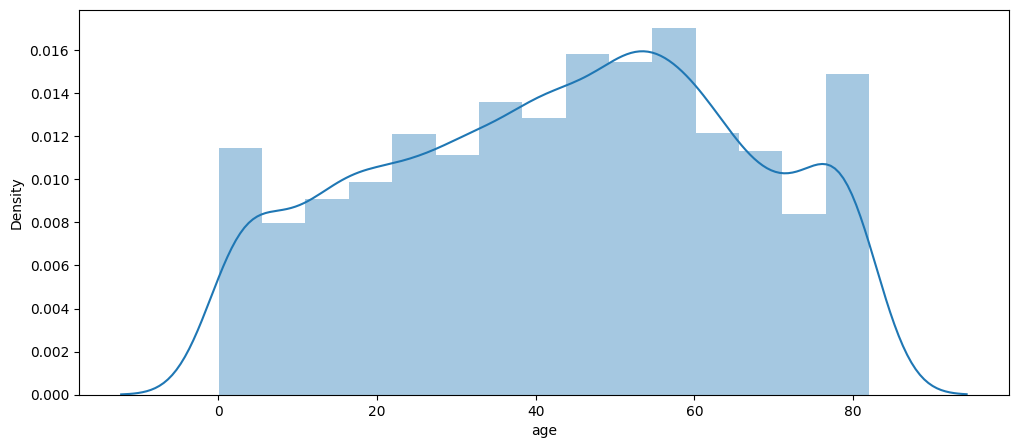

In [24]:
# melihat distribusi perbesaran usia atau umur dari dataset
plt.figure(figsize=(12,5))
sns.distplot(df['age'], bins=15);

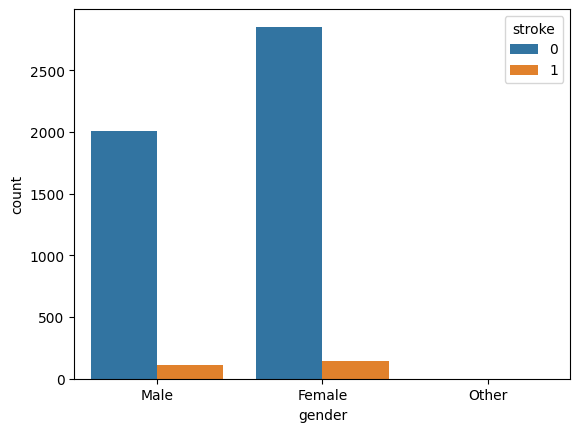

In [25]:
sns.countplot(x='gender', data=df, hue='stroke');

0    4861
1     249
Name: stroke, dtype: int64

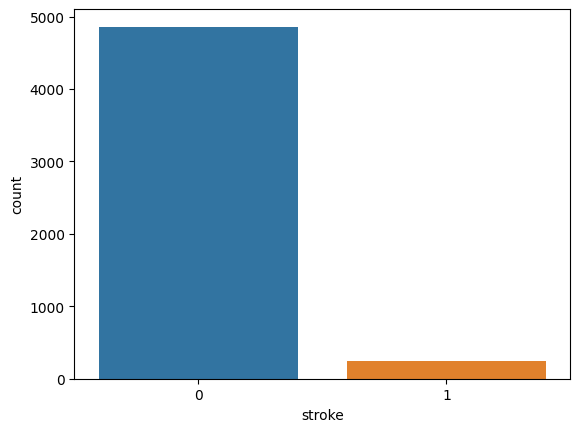

In [26]:
sns.countplot(x='stroke', data=df)
df.stroke.value_counts()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13832\201384864.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="age", y="avg_glucose_level", hue='stroke', ci=None);


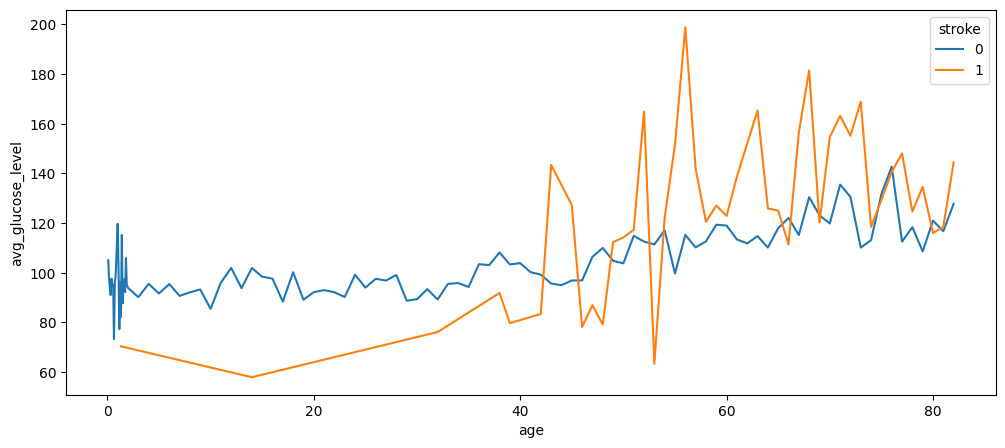

In [27]:
plt.figure(figsize=(12,5))
sns.lineplot(data=df, x="age", y="avg_glucose_level", hue='stroke', ci=None);

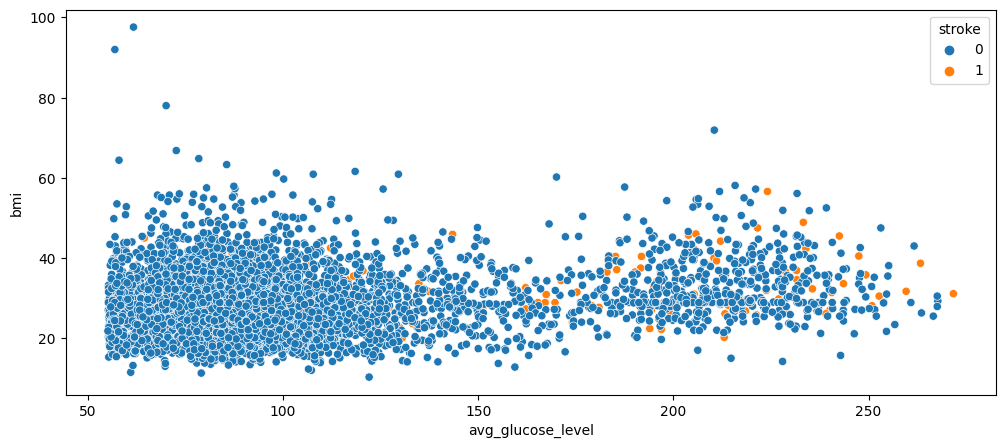

In [28]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='avg_glucose_level', y='bmi', hue='stroke', data=df);

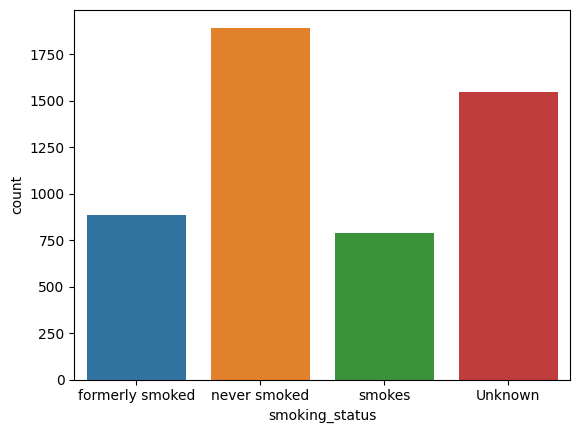

In [29]:
sns.countplot(x='smoking_status', data=df);

In [31]:
# Mengetahui persebaran orang yang terkena stroke dan kaitanya dengan bmi dan level glukosa
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    shared_yaxes =True,
    rows=1, cols=2,
    horizontal_spacing = 0.02,
    subplot_titles = ("Average Glucose level", "Body mass index")
)

for i in [0,1]:
    if i == 0:
        name = 'No'
        color = 'rgb(217,175,107)'
        group = 'g_No'
    else:
        name = 'Yes'
        color = 'rgb(204,80,62)'
        group = 'g_Yes'
        
    fig.add_trace(
        go.Histogram(
            x = df[df['stroke']==i]['avg_glucose_level'],
            nbinsx  = 50,
            legendgroup = group,
            name = name,
            marker = dict(color=color),
            showlegend = False
        ),
        row=1, col=1,
    )
    
    fig.add_trace(
        go.Histogram(
            x = df[df['stroke']==i]['bmi'],
            nbinsx  = 50,
            legendgroup = group,
            name = name,
            marker = dict(color=color)
        ),
        row=1, col=2
    )

fig.update_layout(barmode='overlay', bargap=0)
fig.update_xaxes(row=1, col=1, title_text='Glucose level')
fig.update_xaxes(row=1, col=2, title_text='BMI')
fig.update_yaxes(row=1, col=1, title_text='count')
fig.update_layout(legend_title_text='Stroke')

fig.show()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# dari hasil visualisasi diatas Kami tidak melihat hubungan yang jelas antara kadar Glukosa, BMI dengan stroke, orang-orang bisa terkena stroke 
# di setiap level Glukosa dan BMI.

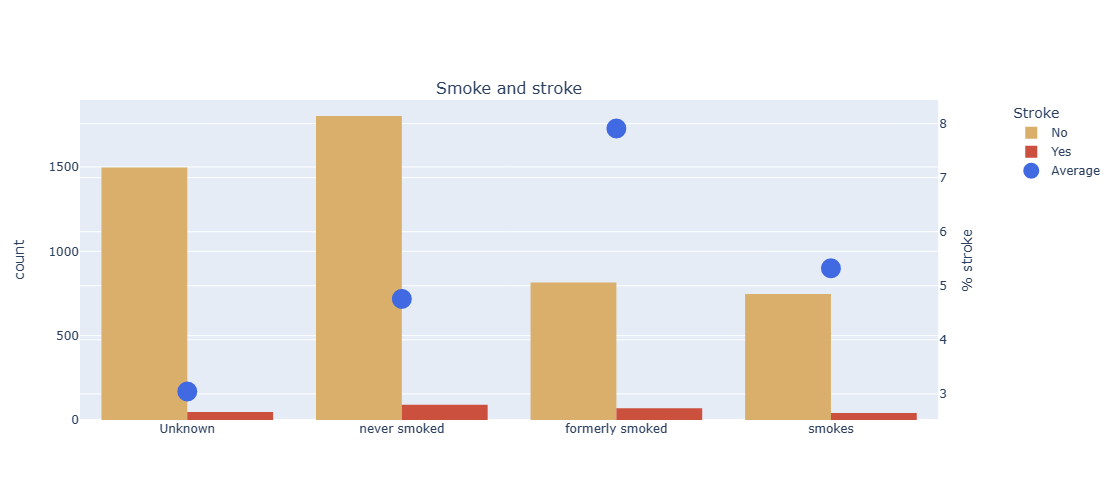

In [ ]:
my_size = {'width':800, 'height':500}
temp = df.groupby(by='smoking_status')['stroke'].agg('mean')*100

fig = make_subplots(
    subplot_titles = ["Smoke and stroke"],
    specs=[[{"secondary_y": True}]]
)

for i in [0,1]:
    
    if i == 0:
        name = 'No'
        color = 'rgb(217,175,107)'
    else:
        name = 'Yes'
        color = 'rgb(204,80,62)'
        
    
    fig.add_trace(
        go.Histogram(x=df[df['stroke']==i]['smoking_status'], 
                     name=name, 
                     marker = dict(color=color)),
        secondary_y=False,
    )

fig.add_trace(
    go.Scatter(x=temp.index, 
               y=temp.values, 
               name="Average", 
               mode='markers', 
               marker=dict(size=20, color='royalblue')),
    secondary_y=True,
)

fig.update_layout(legend_title_text='Stroke', **my_size)
fig.update_yaxes(title_text='count', secondary_y=False)
fig.update_yaxes(title_text='% stroke', secondary_y=True)

In [ ]:
# Dari hasil visualisasi diatas dapat dilihat bahwa orang yang merokok (Saat ini) dan pernah merokok sebelumnya 
# memiliki rata-rata peluang terkena stroke lebih tinggi (jadi merokok memiliki korelasi terhadap stroke)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



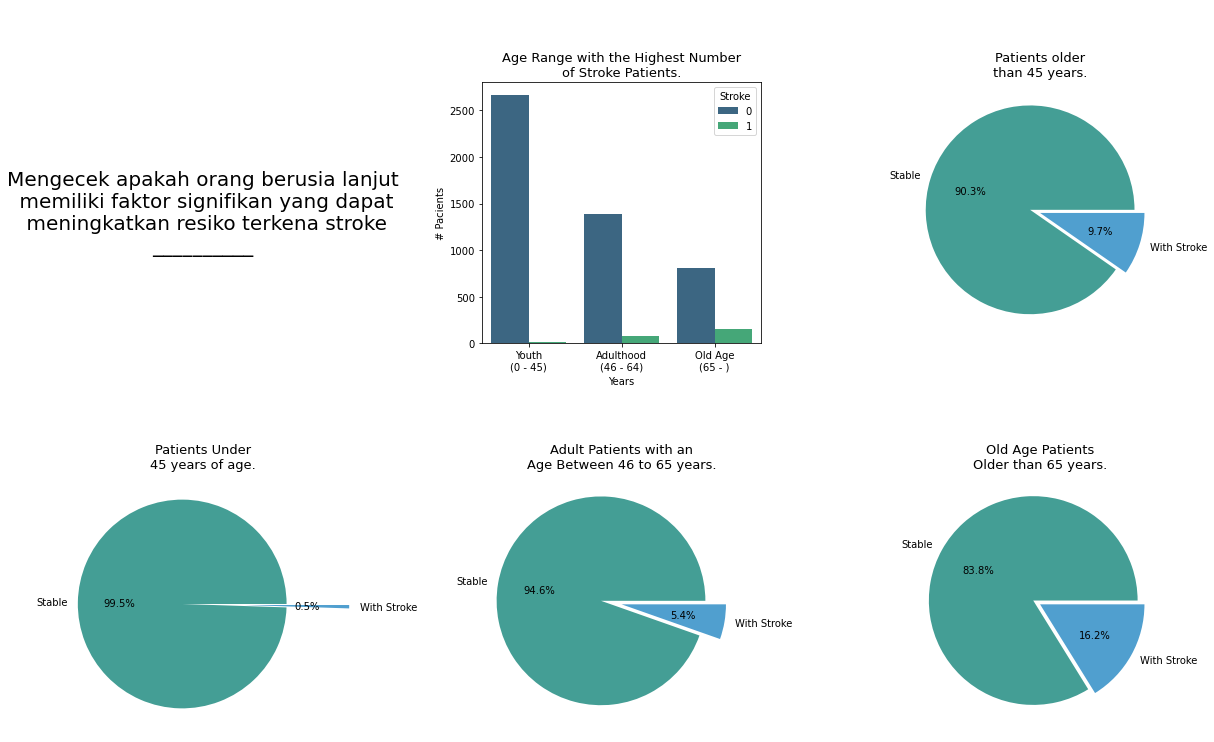

In [ ]:
# DF of patients categorized by age range.
df['age_range'] = pd.cut(df['age'], bins=[0, 46, 65, np.inf], include_lowest=True,
                             labels=["Youth\n(0 - 45)", "Adulthood\n(46 - 64)", "Old Age\n(65 - )"])

df['old_age'] = pd.cut(df['age'], bins=[0, 46, np.inf], include_lowest=True,
                             labels=["Youth", "Adulthood & Old Age"])

# Adulthood & Old Age.
adul_old = len(df.loc[(df['old_age'] == "Adulthood & Old Age") & (df['stroke'] == 0)])
adul_old_stroke = len(df.loc[(df['old_age'] == "Adulthood & Old Age") & (df['stroke'] == 1)])
adul_old_total = len(df.loc[(df['old_age'] == "Adulthood & Old Age")])
adul_old = round((adul_old / adul_old_total) * 100, 2)
adul_old_stroke = round((adul_old_stroke / adul_old_total) * 100, 2)
patients_adul_old = [adul_old, adul_old_stroke]

# Youth.
youth = len(df.loc[(df['age_range'] == "Youth\n(0 - 45)") & (df['stroke'] == 0)])
youth_stroke = len(df.loc[(df['age_range'] == "Youth\n(0 - 45)") & (df['stroke'] == 1)])
youth_total = len(df.loc[(df['age_range'] == "Youth\n(0 - 45)")])
youth = round((youth / youth_total) * 100, 2)
youth_stroke = round((youth_stroke / youth_total) * 100, 2)
patients_youth = [youth, youth_stroke]

# Adulthood.
adul = len(df.loc[(df['age_range'] == "Adulthood\n(46 - 64)") & (df['stroke'] == 0)])
adul_stroke = len(df.loc[(df['age_range'] == "Adulthood\n(46 - 64)") & (df['stroke'] == 1)])
adul_total = len(df.loc[(df['age_range'] == "Adulthood\n(46 - 64)")])
adul = round((adul / adul_total) * 100, 2)
adul_stroke = round((adul_stroke / adul_total) * 100, 2)
patients_adul = [adul, adul_stroke]

# Old Age.
old = len(df.loc[(df['age_range'] == "Old Age\n(65 - )") & (df['stroke'] == 0)])
old_stroke = len(df.loc[(df['age_range'] == "Old Age\n(65 - )") & (df['stroke'] == 1)])
old_total = len(df.loc[(df['age_range'] == "Old Age\n(65 - )")])
old = round((old / old_total) * 100, 2)
old_stroke = round((old_stroke / old_total) * 100, 2)
patients_old = [old, old_stroke]

# Plot
fig = plt.figure(figsize=(20,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.5, hspace=0.5)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Mengecek apakah orang berusia lanjut\n memiliki faktor signifikan yang dapat\n meningkatkan resiko terkena stroke\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot Age Range.
ax1 = fig.add_subplot(gs[0,1])
# Definisikan palette
palette = "viridis"
ax1 = sns.countplot(df['age_range'], hue=df['stroke'], palette=palette)
ax1.set_title(f"\n\n\nAge Range with the Highest Number\nof Stroke Patients.", fontsize=13)
ax1.legend(title='Stroke')
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax1.set_xlabel('Years')
ax1.set_ylabel('# Pacients')

# Plot Adul Old.
ax2 = fig.add_subplot(gs[0, 2])
ax2 = plt.pie(patients_adul_old, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("Patients older\nthan 45 years.", fontsize=13)

# Plot Youth.
ax2 = fig.add_subplot(gs[1, 0])
ax2 = plt.pie(patients_youth, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0.4], colors = ['#449E95', '#509FCF'])
plt.title("Patients Under\n45 years of age.", fontsize=13)

# Plot Adul.
ax2 = fig.add_subplot(gs[1, 1])
ax2 = plt.pie(patients_adul, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0], colors = ['#449E95', '#509FCF'])
plt.title("Adult Patients with an\nAge Between 46 to 65 years.", fontsize=13)

# Plot Old.
ax2 = fig.add_subplot(gs[1, 2])
ax2 = plt.pie(patients_old, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.075, 0], colors = ['#449E95', '#509FCF'])
plt.title("Old Age Patients\nOlder than 65 years.", fontsize=13)

plt.show()

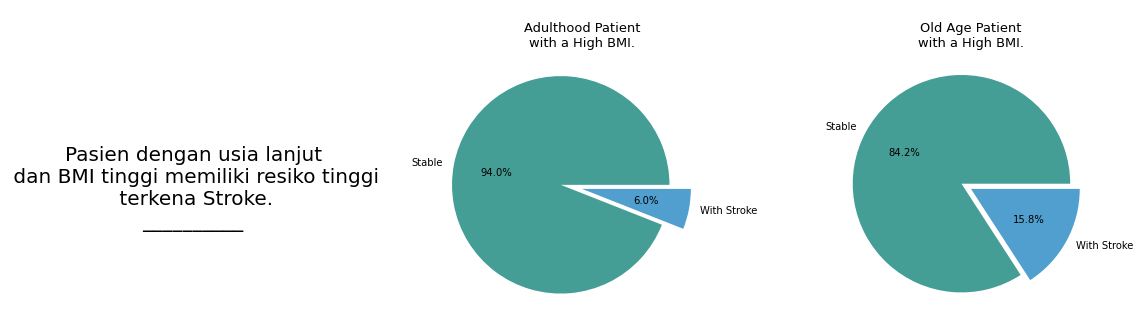

In [ ]:
# DF of Patients categorized by their high BMI
df['high BMI'] = pd.cut(df['bmi'], bins=[0, 18.5, 24.9, np.inf], include_lowest=True,
                            labels=["Below Average", "Normal", "High BMI"])

# Adulthood.
adul_h_AgeBMI = len(df.loc[(df['age_range'] == 'Adulthood\n(46 - 64)') & (df['high BMI'] == 'High BMI') & (df['stroke'] == 0)])
adul_h_AgeBMI_stroke = len(df.loc[(df['age_range'] == 'Adulthood\n(46 - 64)') & (df['high BMI'] == 'High BMI') & (df['stroke'] == 1)])
adul_h_AgeBMI_total = len(df.loc[(df['age_range'] == 'Adulthood\n(46 - 64)') & (df['high BMI'] == 'High BMI')])
adul_h_AgeBMI = round((adul_h_AgeBMI / adul_h_AgeBMI_total) * 100, 2)
adul_h_AgeBMI_stroke = round((adul_h_AgeBMI_stroke / adul_h_AgeBMI_total) * 100, 2)
pacients_adul_h_AgeBMI_total = [adul_h_AgeBMI, adul_h_AgeBMI_stroke]

# Old Age.
old_h_AgeBMI = len(df.loc[(df['age_range'] == 'Old Age\n(65 - )') & (df['high BMI'] == 'High BMI') & (df['stroke'] == 0)])
old_h_AgeBMI_stroke = len(df.loc[(df['age_range'] == 'Old Age\n(65 - )') & (df['high BMI'] == 'High BMI') & (df['stroke'] == 1)])
old_h_AgeBMI_total = len(df.loc[(df['age_range'] == 'Old Age\n(65 - )') & (df['high BMI'] == 'High BMI')])
old_h_AgeBMI = round((old_h_AgeBMI / old_h_AgeBMI_total) * 100, 2)
old_h_AgeBMI_stroke = round((old_h_AgeBMI_stroke / old_h_AgeBMI_total) * 100, 2)
pacients_old_h_AgeBMI = [old_h_AgeBMI, old_h_AgeBMI_stroke]

# Plot
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Pasien dengan usia lanjut\n dan BMI tinggi memiliki resiko tinggi\n terkena Stroke.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot Adulthood.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(pacients_adul_h_AgeBMI_total, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.2, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nAdulthood Patient\nwith a High BMI.", fontsize=13)

# Plot Old.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(pacients_old_h_AgeBMI, labels = ['Stable', 'With Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nOld Age Patient\nwith a High BMI.", fontsize=13)

plt.show()

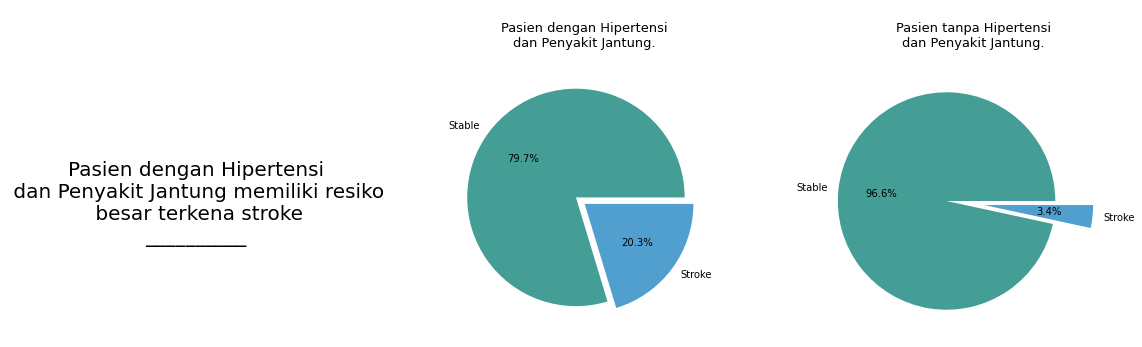

In [ ]:
# With.
with_hh = len(df.loc[(df['hypertension'] == 1) & (df['heart_disease'] == 1) & (df['stroke'] == 0)])
with_hh_stroke = len(df.loc[(df['hypertension'] == 1) & (df['heart_disease'] == 1) & (df['stroke'] == 1)])
with_hh_total = len(df.loc[(df['hypertension'] == 1) & (df['heart_disease'] == 1)])
with_hh = round((with_hh / with_hh_total) * 100, 2)
with_hh_stroke = round((with_hh_stroke / with_hh_total) * 100, 2)
patients_with_hh = [with_hh, with_hh_stroke]

# Without.
without_hh = len(df.loc[(df['hypertension'] == 0) & (df['heart_disease'] == 0) & (df['stroke'] == 0)])
without_hh_stroke = len(df.loc[(df['hypertension'] == 0) & (df['heart_disease'] == 0) & (df['stroke'] == 1)])
without_hh_total = len(df.loc[(df['hypertension'] == 0) & (df['heart_disease'] == 0)])
without_hh = round((without_hh / without_hh_total) * 100, 2)
without_hh_stroke = round((without_hh_stroke / without_hh_total) * 100, 2)
patients_without_hh = [without_hh, without_hh_stroke]

# Plot
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Pasien dengan Hipertensi\n dan Penyakit Jantung memiliki resiko\n besar terkena stroke\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.tick_params(left=False, bottom=False)
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot With.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(patients_with_hh, labels = ['Stable', 'Stroke'], autopct='%1.1f%%', explode=[0.1, 0], colors = ['#449E95', '#509FCF'])
plt.title("\nPasien dengan Hipertensi\ndan Penyakit Jantung.\n", fontsize=13)

# Plot Without.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(patients_without_hh, labels = ['Stable', 'Stroke'], autopct='%1.1f%%', explode=[0.25, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("\nPasien tanpa Hipertensi\ndan Penyakit Jantung.\n", fontsize=13)

plt.show()

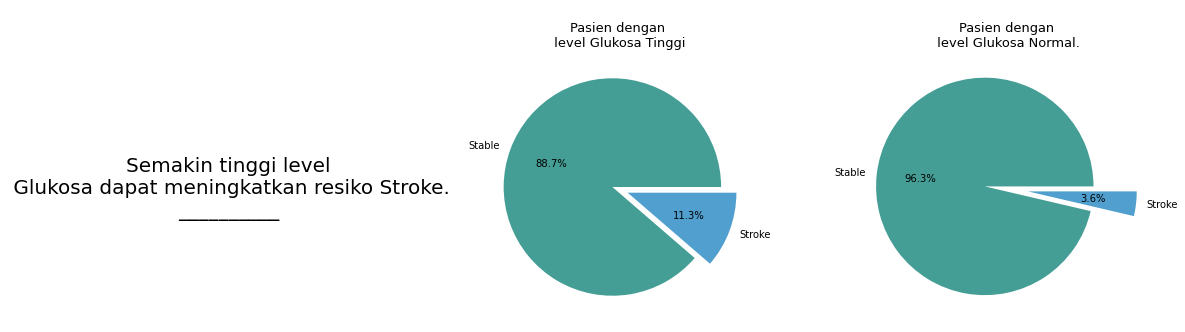

In [ ]:
df['avg_gluc_lvl_range'] = pd.cut(df['avg_glucose_level'], bins=[0, 70, 140, np.inf], include_lowest=True,
                                          labels=["Low Level", "Normal Level", "High Level"])

# High. 
high = len(df.loc[(df['avg_gluc_lvl_range'] == 'High Level') & (df['stroke'] == 0)])
high_stroke =  len(df.loc[(df['avg_gluc_lvl_range'] == 'High Level') & (df['stroke'] == 1)])
high_total = len(df.loc[(df['avg_gluc_lvl_range'] == 'High Level')])
high = round((high / high_total) * 100, 2)
high_stroke = round((high_stroke / high_total) * 100, 2)
patients_high = [high, high_stroke]

# Normal.
normal = len(df.loc[(df['avg_gluc_lvl_range'] == 'Normal Level') & (df['stroke'] == 0)])
normal_stroke = len(df.loc[(df['avg_gluc_lvl_range'] == 'Normal Level') & (df['stroke'] == 1)])
normal_total = len(df.loc[(df['avg_gluc_lvl_range'] == 'Normal Level')])
normal = round((normal / normal_total) * 100, 2)
normal_stroke = round((normal_stroke / normal_total) * 100, 2)
patients_normal = [normal, normal_stroke]

# Plot.
fig = plt.figure(figsize=(20,5))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.15)

# Plot Title.
ax0 = fig.add_subplot(gs[0,0])
ax0.text(0.5,0.5,'Semakin tinggi level\n Glukosa dapat meningkatkan resiko Stroke.\n__________',
         fontsize=20, horizontalalignment='center', verticalalignment='center')
ax0.spines["bottom"].set_visible(False)
ax0.spines["top"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.tick_params(left=False, bottom=False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])

# Plot High.
ax1 = fig.add_subplot(gs[0,1])
ax1 = plt.pie(patients_high, labels = ['Stable', 'Stroke'], autopct='%1.1f%%', explode=[0.05, 0.1], colors = ['#449E95', '#509FCF'])
plt.title("\nPasien dengan\n level Glukosa Tinggi", fontsize=13)

# Plot Low.
ax0 = fig.add_subplot(gs[0,2])
ax0 = plt.pie(patients_normal, labels = ['Stable', 'Stroke'], autopct='%1.1f%%', explode=[0.2, 0.2], colors = ['#449E95', '#509FCF'])
plt.title("\nPasien dengan\n level Glukosa Normal.", fontsize=13)

plt.show()

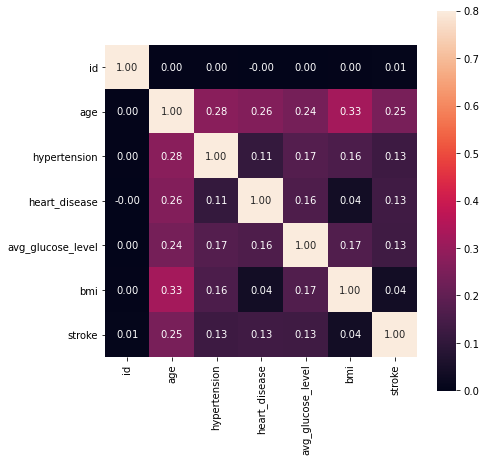

In [ ]:
correlation = df.corr()
fig, axes = plt.subplots(figsize=(7, 7))
sns.heatmap(correlation, vmax=.8, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10});

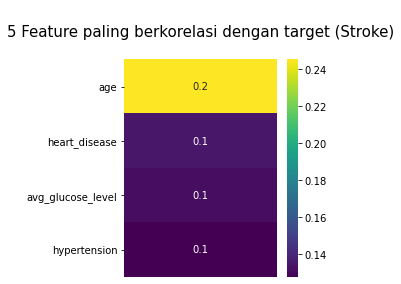

In [ ]:
df_encode = df
df_corr = abs(df_encode.corr())
palette_matrix = "viridis"
# DF with the features with the highest correlation and the target is removed.
corr_higher = pd.DataFrame(df_corr['stroke'].sort_values(ascending=False)).head()
corr_higher = corr_higher.drop('stroke', axis=0)

# DF with the features with less correlation.
corr_less = pd.DataFrame(df['stroke'].sort_values()).head()

# List of DFs of Correlations
corr_ls = [corr_higher]

# Plot Description.
description = [str(f'\n5 Feature paling berkorelasi dengan target (Stroke)\n')]

# Grid Plot.
fig = plt.figure(figsize=(12,4))
gs = gridspec.GridSpec(1,2)
gs.update(wspace=1.5, hspace=0.35)

# With a loop, we assign each feature a consecutive number.
for i, j in enumerate(corr_ls):
    ax = plt.subplot(gs[i])
    sns.heatmap(corr_ls[i], annot=True, fmt='.1g', cmap=palette_matrix, cbar=True)
    ax.set_title(description[i], fontsize=15)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.tick_params(bottom=False)
plt.show()

# Step 4 : Data Prepocessing 

In [ ]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,old_age,high BMI,avg_gluc_lvl_range
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Old Age\n(65 - ),Adulthood & Old Age,High BMI,High Level
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Adulthood\n(46 - 64),Adulthood & Old Age,High BMI,High Level
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Old Age\n(65 - ),Adulthood & Old Age,High BMI,Normal Level
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Adulthood\n(46 - 64),Adulthood & Old Age,High BMI,High Level
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Old Age\n(65 - ),Adulthood & Old Age,Normal,High Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0,Old Age\n(65 - ),Adulthood & Old Age,High BMI,Normal Level
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,Old Age\n(65 - ),Adulthood & Old Age,High BMI,Normal Level
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,Youth\n(0 - 45),Youth,High BMI,Normal Level
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,Adulthood\n(46 - 64),Adulthood & Old Age,High BMI,High Level


In [ ]:
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0,'Other':2})

df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})

df['work_type'] = df['work_type'].map({'Private': 0, 'Self-employed': 1,'children':2,'Govt_job':3,'Never_worked':4})

df['Residence_type'] = df['Residence_type'].map({'Urban': 1, 'Rural': 0})

df['smoking_status'] = df['smoking_status'].map({'never smoked': 0, 'Unknown': 1,'formerly smoked':2,'smokes':3})
df.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range,old_age,high BMI,avg_gluc_lvl_range
0,9046,1,67.0,0,1,1,0,1,228.69,36.600000,2,1,Old Age\n(65 - ),Adulthood & Old Age,High BMI,High Level
1,51676,0,61.0,0,0,1,1,0,202.21,28.893237,0,1,Adulthood\n(46 - 64),Adulthood & Old Age,High BMI,High Level
2,31112,1,80.0,0,1,1,0,0,105.92,32.500000,0,1,Old Age\n(65 - ),Adulthood & Old Age,High BMI,Normal Level
3,60182,0,49.0,0,0,1,0,1,171.23,34.400000,3,1,Adulthood\n(46 - 64),Adulthood & Old Age,High BMI,High Level
4,1665,0,79.0,1,0,1,1,0,174.12,24.000000,0,1,Old Age\n(65 - ),Adulthood & Old Age,Normal,High Level
5,56669,1,81.0,0,0,1,0,1,186.21,29.000000,2,1,Old Age\n(65 - ),Adulthood & Old Age,High BMI,High Level
6,53882,1,74.0,1,1,1,0,0,70.09,27.400000,0,1,Old Age\n(65 - ),Adulthood & Old Age,High BMI,Normal Level
7,10434,0,69.0,0,0,0,0,1,94.39,22.800000,0,1,Old Age\n(65 - ),Adulthood & Old Age,Normal,Normal Level
8,27419,0,59.0,0,0,1,0,0,76.15,28.893237,1,1,Adulthood\n(46 - 64),Adulthood & Old Age,High BMI,Normal Level
9,60491,0,78.0,0,0,1,0,1,58.57,24.200000,1,1,Old Age\n(65 - ),Adulthood & Old Age,Normal,Low Level


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  5110 non-null   int64   
 1   gender              5110 non-null   int64   
 2   age                 5110 non-null   float64 
 3   hypertension        5110 non-null   int64   
 4   heart_disease       5110 non-null   int64   
 5   ever_married        5110 non-null   int64   
 6   work_type           5110 non-null   int64   
 7   Residence_type      5110 non-null   int64   
 8   avg_glucose_level   5110 non-null   float64 
 9   bmi                 5110 non-null   float64 
 10  smoking_status      5110 non-null   int64   
 11  stroke              5110 non-null   int64   
 12  age_range           5110 non-null   category
 13  old_age             5110 non-null   category
 14  high BMI            5110 non-null   category
 15  avg_gluc_lvl_range  5110 non-null   ca

### Splitting Data

In [ ]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']].values
X[0:5]

array([[  1.        ,  67.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   1.        , 228.69      ,
         36.6       ,   2.        ],
       [  0.        ,  61.        ,   0.        ,   0.        ,
          1.        ,   1.        ,   0.        , 202.21      ,
         28.89323691,   0.        ],
       [  1.        ,  80.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        , 105.92      ,
         32.5       ,   0.        ],
       [  0.        ,  49.        ,   0.        ,   0.        ,
          1.        ,   0.        ,   1.        , 171.23      ,
         34.4       ,   3.        ],
       [  0.        ,  79.        ,   1.        ,   0.        ,
          1.        ,   1.        ,   0.        , 174.12      ,
         24.        ,   0.        ]])

In [ ]:
y = df["stroke"]
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

# Step 5 : Modeling Data

In [ ]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
# Scalling Data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_trainset = scaler.fit_transform(X_trainset)
X_testset = scaler.fit_transform(X_testset)

In [ ]:
print('Shape of X training set {}'.format(X_testset.shape),'&',' Size of Y training set {}'.format(y_testset.shape))

Shape of X training set (1533, 10) &  Size of Y training set (1533,)


In [ ]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (3577, 10) &  Size of Y training set (3577,)


In [ ]:
acc=[]
model=[]

### DECISION TREE

In [ ]:
# Deklrasikan algoritma 

In [ ]:
strokeTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
#othre criterion options are gini and log_loss
strokeTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
strokeTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [ ]:
# Prediksi 

In [ ]:
trainTree = strokeTree.predict(X_trainset)

In [ ]:
predTree = strokeTree.predict(X_testset)

In [ ]:
print (predTree [0:5])
print (y_testset [0:5])

[0 0 0 0 0]
2778    0
4029    0
261     0
1868    0
1028    0
Name: stroke, dtype: int64


In [ ]:
# Evaluasi Model 

In [ ]:
Decision_Tree_Train=metrics.accuracy_score(y_trainset, trainTree)
Decision_Tree_Test=metrics.accuracy_score(y_testset, predTree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9556425309849967


In [ ]:
# Plotting Decision Tree

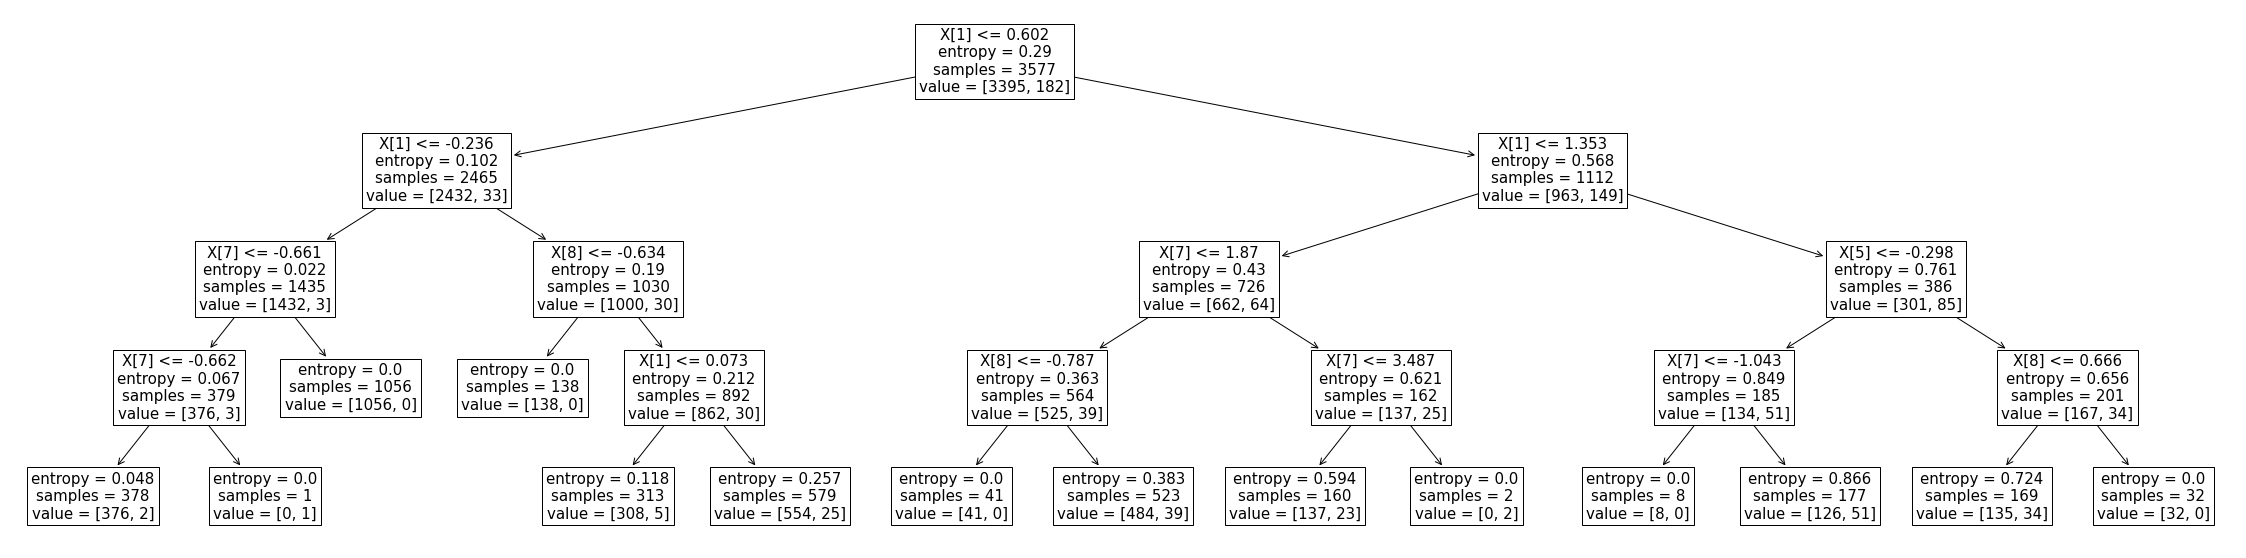

In [ ]:
fig, axe = plt.subplots(figsize=(40,10));
tree.plot_tree(strokeTree,ax = axe, fontsize=15)
plt.show()

In [ ]:
# Simpan hasil akurasi
acc.append(Decision_Tree_Test)
model.append('Decision Tree')

### KNN

In [ ]:
df = df.drop(['age_range', 'old_age', 'avg_gluc_lvl_range', 'high BMI'], axis=1)

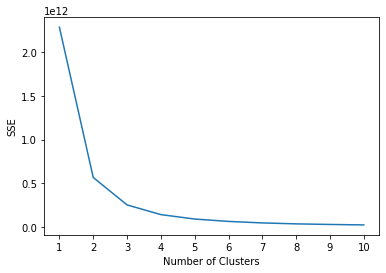

In [ ]:
kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Elbow Method: Dalam pendekatan ini, kita memplot jumlah klaster versus SSE. Nilai SSE akan menurun saat jumlah klaster meningkat. 
# Namun, pada titik tertentu, penurunan SSE akan mulai berkurang secara signifikan, dan grafik akan terlihat seperti "siku" (elbow). 
# Pada titik tersebut, disarankan untuk memilih jumlah klaster yang sesuai. Pilih jumlah klaster di sekitar "siku" grafik di mana penurunan 
# SSE tidak signifikan lagi.

In [ ]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_trainset,y_trainset)
neigh

KNeighborsClassifier(n_neighbors=2)

In [ ]:
yhat = neigh.predict(X_testset)
yhat[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
KNN_Train=metrics.accuracy_score(y_trainset, neigh.predict(X_trainset))
KNN_Test=metrics.accuracy_score(y_testset, yhat)

In [ ]:
print("Train set Accuracy: ",KNN_Train )
print("Test set Accuracy: ",KNN_Test )

Train set Accuracy:  0.9575062901873078
Test set Accuracy:  0.9504240052185258


In [ ]:
# Simpan nilai akurasi untuk train dan test data
acc.append(KNN_Test)
model.append('KNN')

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_trainset,y_trainset)

train_values = NaiveBayes.predict(X_trainset)
predicted_values = NaiveBayes.predict(X_testset)
Naive_Bayes_Train = metrics.accuracy_score(y_trainset, train_values)
Naive_Bayes_Test = metrics.accuracy_score(y_testset, predicted_values)
acc.append(Naive_Bayes_Test)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", Naive_Bayes_Test)

print(classification_report(y_testset,predicted_values))

Naive Bayes Accuracy is:  0.8695368558382257
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1466
           1       0.17      0.49      0.25        67

    accuracy                           0.87      1533
   macro avg       0.57      0.69      0.59      1533
weighted avg       0.94      0.87      0.90      1533



In [ ]:
# Membandingkan algoritma

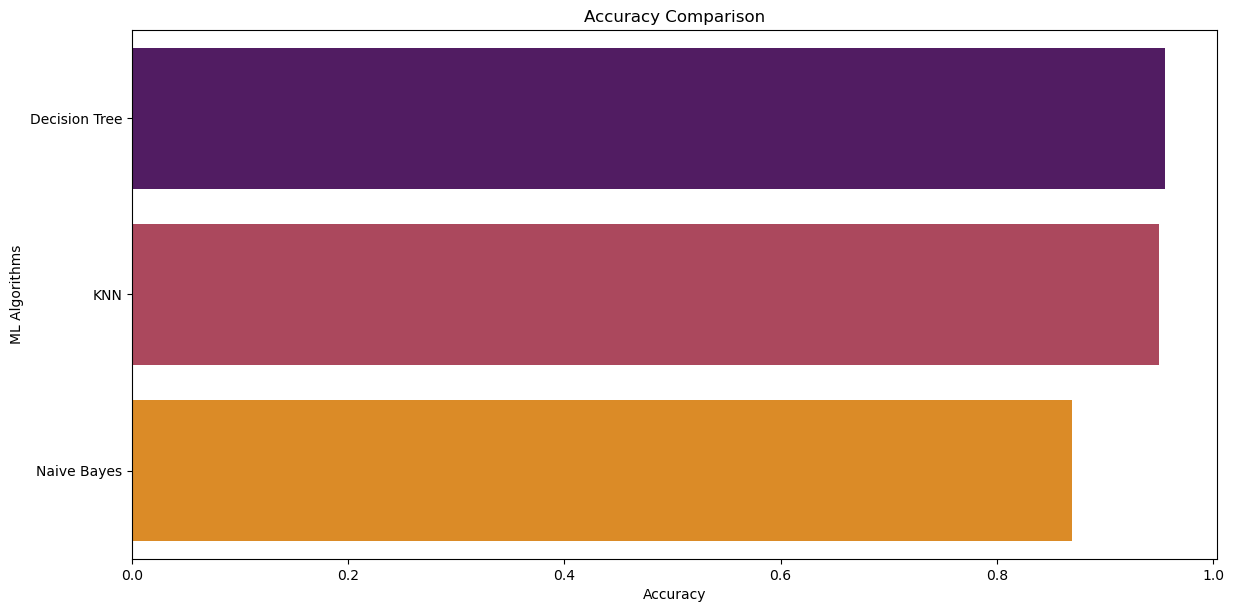

In [ ]:
plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='inferno')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

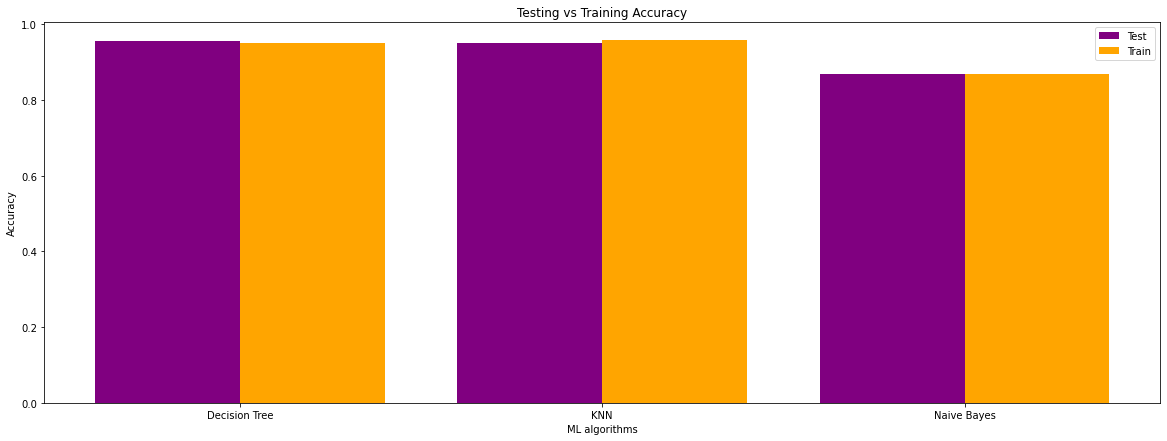

In [ ]:
label = [ 'Decision Tree','KNN','Naive Bayes']
Test = [Decision_Tree_Test, KNN_Test, Naive_Bayes_Test]
Train = [Decision_Tree_Train, KNN_Train, Naive_Bayes_Train]

f, ax = plt.subplots(figsize=(20,7)) # set the size that you'd like (width, height)
X_axis = np.arange(len(label))
plt.bar(X_axis - 0.2,Test, 0.4, label = 'Test', color=('purple'))
plt.bar(X_axis + 0.2,Train, 0.4, label = 'Train', color=('orange'))

plt.xticks(X_axis, label)
plt.xlabel("ML algorithms")
plt.ylabel("Accuracy")
plt.title("Testing vs Training Accuracy")
plt.legend()
#plt.savefig('train vs test.png')
plt.show()